In [1]:
import pipeline
import filepaths as fp

import torch
from rnn_model import EncoderRNN, AttnDecoderRNN
from rnn_model_train import trainIters
from rnn_model_predict import predict_all

In [ ]:

(encoder1, attn_decoder1, slang, tlang, max_length) = pipeline.train(
    fp.spath_toy, fp.tpath_toy, 1500, hidden_size = 256, dropout_p =0.1)

pipeline.evaluate(fp.spath_toy, fp.tpath_toy, slang, tlang, 
    encoder1, attn_decoder1, max_length, useCache = True)

0m 3s (- 1m 18s) (60 4%) 3.3438
0m 6s (- 1m 19s) (120 8%) 3.3559
0m 12s (- 1m 29s) (180 12%) 3.1891
0m 16s (- 1m 24s) (240 16%) 3.2325
0m 21s (- 1m 27s) (300 20%) 3.1171
0m 27s (- 1m 25s) (360 24%) 2.9613
0m 30s (- 1m 18s) (420 28%) 2.9114
0m 34s (- 1m 12s) (480 32%) 2.7012
0m 37s (- 1m 7s) (540 36%) 2.7376
0m 41s (- 1m 2s) (600 40%) 2.7558
0m 45s (- 0m 57s) (660 44%) 2.4250
0m 48s (- 0m 52s) (720 48%) 2.3306
0m 52s (- 0m 48s) (780 52%) 2.1836
0m 55s (- 0m 43s) (840 56%) 1.9028
0m 59s (- 0m 39s) (900 60%) 1.7848
1m 3s (- 0m 35s) (960 64%) 1.5740
1m 7s (- 0m 31s) (1020 68%) 1.0751
1m 11s (- 0m 27s) (1080 72%) 1.0652
1m 14s (- 0m 23s) (1140 76%) 0.7810
1m 18s (- 0m 19s) (1200 80%) 0.6018
1m 22s (- 0m 15s) (1260 84%) 0.6303
1m 26s (- 0m 11s) (1320 88%) 0.2514
1m 30s (- 0m 7s) (1380 92%) 0.2323
1m 34s (- 0m 3s) (1440 96%) 0.1369
1m 38s (- 0m 0s) (1500 100%) 0.1025


<Figure size 432x288 with 0 Axes>

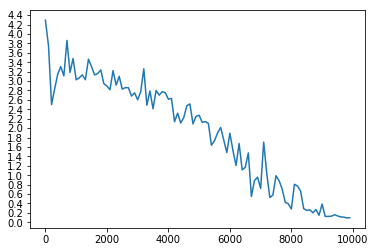

Losses diagram saved in TODO
Models saved in TODO
Predictions written to ../output/toy.predicted.en
Blue score written to ../output/toy.BLEU


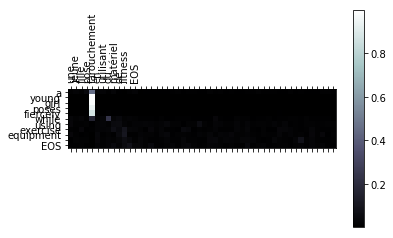

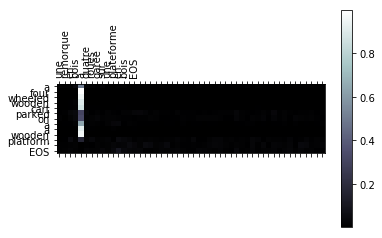

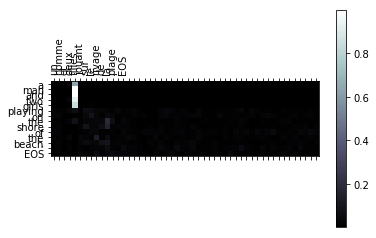

Attention diagrams saved in TODO


(EncoderRNN(
   (embedding): Embedding(165, 256)
   (gru): GRU(256, 256)
 ), AttnDecoderRNN(
   (embedding): Embedding(155, 256)
   (attn): Linear(in_features=512, out_features=50, bias=True)
   (attn_combine): Linear(in_features=512, out_features=256, bias=True)
   (dropout): Dropout(p=0.1)
   (gru): GRU(256, 256)
   (out): Linear(in_features=256, out_features=155, bias=True)
 ), <data_preparation.Lang at 0x7f2090f26320>, <data_preparation.Lang at 0x7f2090f26278>)

In [5]:
hidden_size = 256 
dropout_p = 0.1
n_iters = 1500
max_length = 24

def train_model(index_array_pairs, s_vocab_size, t_vocab_size, max_length):
    
    # create Encoder/Decoder models 
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    encoder = EncoderRNN(s_vocab_size, hidden_size).to(device)
    attn_decoder = AttnDecoderRNN(hidden_size, t_vocab_size, max_length, dropout_p).to(device)

    # train models and return losses to plot
    plot_every = n_iters/100.
    plot_losses = trainIters(
        index_array_pairs, encoder, attn_decoder, n_iters, max_length, 
        print_every=n_iters/25., plot_every = plot_every)
    
    # return trained models and info to plot the losses
    return encoder, attn_decoder, plot_losses, plot_every

(encoder, attn_decoder, slang, tlang) = pipeline.run(
    fp.spath_toy, fp.tpath_toy, train_model, 
    fp.spath_toy, fp.tpath_toy, predict_all, 
    max_length = 50, useCache = True)
